In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


result_times = pd.read_csv("./data/result_times.csv")
result_value = pd.read_csv("./data/result_value.csv")

In [2]:
original_cmap = sns.color_palette("Spectral_r", as_cmap=True)  # Reverse the colormap
colors = np.concatenate((original_cmap(np.linspace(0, 0.35, 4)), original_cmap(np.linspace(0.7, 1, 3))), axis=0) # Extract 10 colors
custom_palette = np.clip(colors, 0, 1)  # Ensure valid RGB range

# Convert darkened colors into a Seaborn-friendly palette
custom_palette = [tuple(c) for c in custom_palette]  # Convert array to list of 
one_color = custom_palette[1]

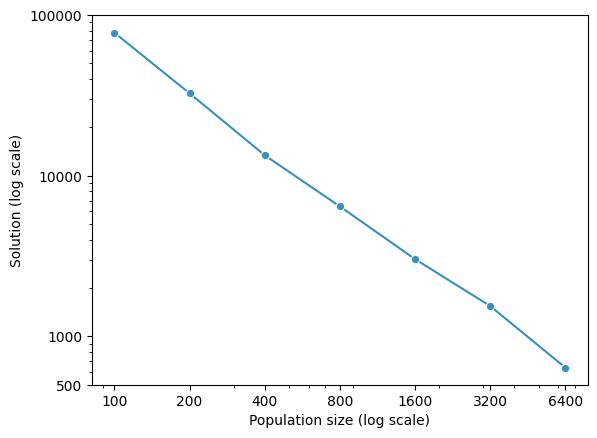

In [3]:
figure_1 = plt.figure()
ax = plt.gca()

sns.lineplot(x='x', y='y', data=result_value, marker="o", ax=ax, dashes=False, color=one_color)

ax.set_ylabel('Solution (log scale)')
ax.set_xlabel('Population size (log scale)')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks([100, 200, 400, 800, 1600, 3200, 6400])
ax.set_xticklabels([100, 200, 400, 800, 1600, 3200, 6400])
ax.set_yticks([500, 1000, 10000, 100000])
ax.set_yticklabels([500, 1000, 10000, 100000])

plt.show()
figure_1.savefig('./out/evaluation_solution.png')

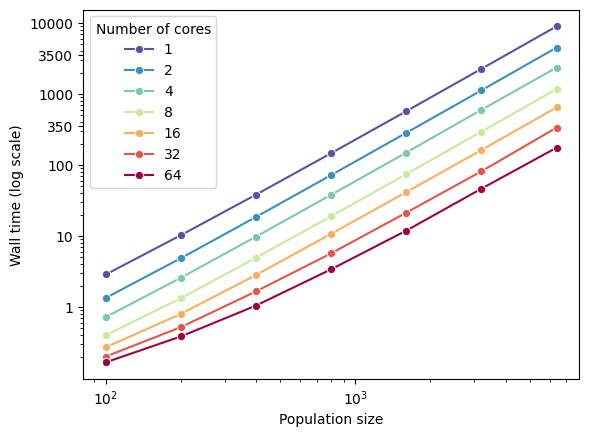

In [4]:
import numpy as np
figure_1 = plt.figure()
ax = plt.gca()

ideal_data = pd.DataFrame({
    'n_cores': [1, 2, 4, 8,16 ,32 ,64],
    'speedup': [1, 2, 4, 8,16 ,32 ,64],
})

sns.lineplot(x='n_agents', y='time', data=result_times, marker="o", ax=ax, dashes=False, hue='n_cores', palette=custom_palette)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_yticks([1, 10, 100, 350, 1000, 3500, 10000])
ax.set_yticklabels([1, 10, 100, 350, 1000, 3500, 10000])


ax.set_xlabel('Population size')
ax.set_ylabel('Wall time (log scale)')

ax.legend(title='Number of cores', loc='upper left')

plt.show()
figure_1.savefig('./out/times.png')

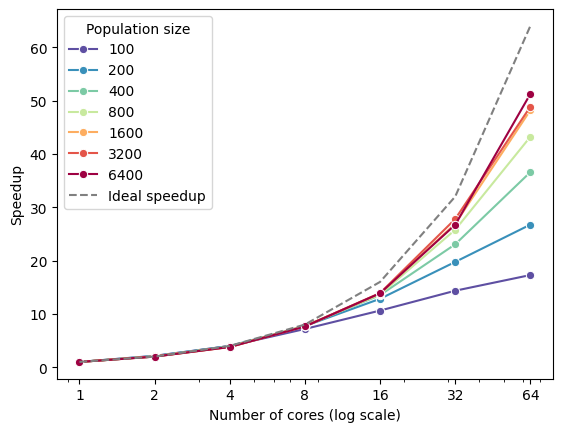

In [5]:
figure_1 = plt.figure()
ax = plt.gca()

ideal_data = pd.DataFrame({
    'n_cores': [1, 2, 4, 8,16 ,32 ,64],
    'speedup': [1, 2, 4, 8,16 ,32 ,64],
})

sns.lineplot(x='n_cores', y='speedup', data=result_times, marker="o", ax=ax, dashes=False, hue='n_agents', palette=custom_palette)
sns.lineplot(x='n_cores', y='speedup', data=ideal_data, ax=ax, color='grey', linestyle='--', label='Ideal speedup')
ax.set_xscale('log')
ax.set_xticks([1, 2, 4, 8, 16, 32, 64])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64])

ax.set_xlabel('Number of cores (log scale)')
ax.set_ylabel('Speedup')

ax.legend(title='Population size', loc='upper left')

plt.show()
figure_1.savefig('./out/speedup.png')

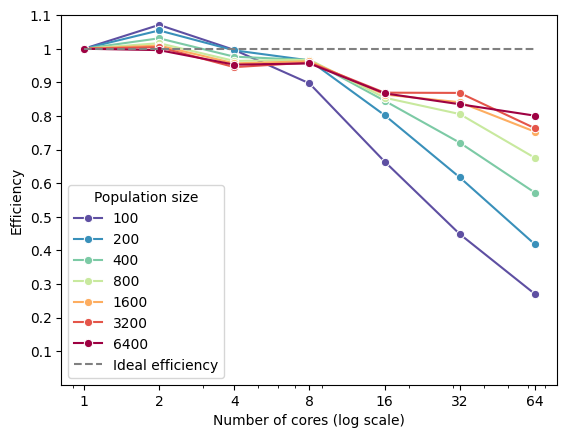

In [6]:
figure_1 = plt.figure()
ax = plt.gca()

sns.lineplot(x='n_cores', y='efficiency', data=result_times, marker="o", ax=ax, dashes=False, hue='n_agents', palette=custom_palette)
ax.set_xscale('log')
ax.set_xticks([1, 2, 4, 8, 16, 32, 64])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64])

ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
ax.set_yticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
#add a linear line as y= 1
ax.plot([1, 64], [1, 1], color='grey', linestyle='--', label='Ideal efficiency')
ax.set_ylim(0, 1.1)

ax.set_xlabel('Number of cores (log scale)')
ax.set_ylabel('Efficiency')
ax.legend(title='Population size', loc='lower left')


plt.show()

figure_1.savefig('./out/efficiency.png')

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_7559/3894328466.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scalability_data = pd.concat([scalability_data, new_data], axis=0)


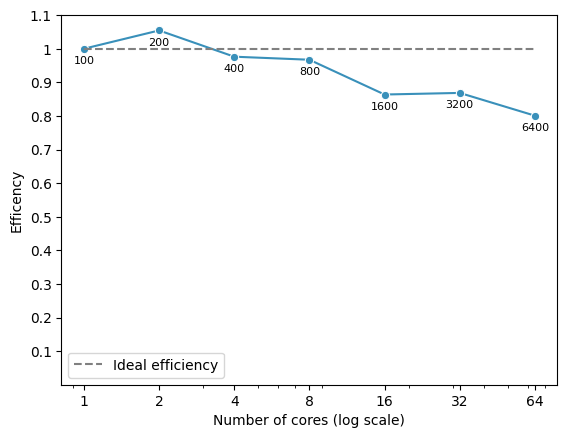

In [7]:
figure_1 = plt.figure()
ax = plt.gca()

scalability_data = pd.DataFrame(columns=['n_agents', 'n_cores', 'time', 'speedup', 'efficiency'])

for i in range(1, 8):
    new_data = result_times[(result_times['n_cores'] == 2**(i-1)) & (result_times['n_agents'] == 2**(i-1)*100)].copy()
    scalability_data = pd.concat([scalability_data, new_data], axis=0)
    

sns.lineplot(x='n_cores', y='efficiency', data=scalability_data, marker="o", ax=ax, dashes=False, color=one_color)
ax.set_xscale('log')
ax.set_xticks([1, 2, 4, 8, 16, 32, 64])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64])

#Add lable to each point
for i in range(len(scalability_data)):
    ax.text(scalability_data['n_cores'].iloc[i], scalability_data['efficiency'].iloc[i]-0.05, scalability_data['n_agents'].iloc[i], fontsize=8, ha='center', va='bottom')

ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
ax.set_yticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
ax.plot([1, 64], [1, 1], color='gray', linestyle='--', label='Ideal efficiency')
ax.set_ylim(0, 1.1)

ax.set_xlabel('Number of cores (log scale)')
ax.set_ylabel('Efficency')
ax.legend(loc='lower left')

plt.show()
figure_1.savefig('./out/scalability.png')